device = multi-gpu, grid_count = 8_000, scheduler = threads, dask = 0
Memory = 3.0720 Gb  Elapsed = 4.28 seconds

device = multi-cpu, grid_count = 16_875, scheduler = threads, dask = 0
Memory = 13.6687 Gb  Elapsed = 18.22 seconds

device = gpu, grid_count = 8_000, scheduler = single-threaded, dask = 0
Memory = 3.0720 Gb  Elapsed = 5.36 seconds

device = cpu, grid_count = 16_875, scheduler = single-threaded, dask = 0
Memory = 13.6687 Gb  Elapsed = 17.10 seconds

device = multi-gpu, grid_count = 8_000, scheduler = threads, dask = 1
Memory = 3.0720 Gb  Elapsed = 5.08 seconds

device = multi-cpu, grid_count = 16_875, scheduler = threads, dask = 1
Memory = 13.6687 Gb  Elapsed = 28.97 seconds

device = gpu, grid_count = 8_000, scheduler = single-threaded, dask = 1
Memory = 3.0720 Gb  Elapsed = 5.02 seconds

device = cpu, grid_count = 16_875, scheduler = single-threaded, dask = 1
Memory = 13.6687 Gb  Elapsed = 31.14 seconds



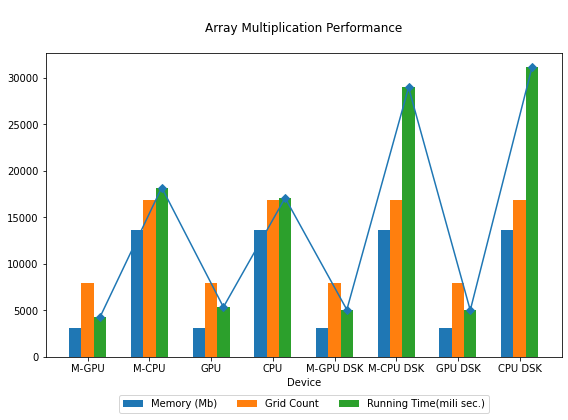

Wall time: 2min


In [1]:
%%time 

from IPython.display import clear_output
clear_output()

from AMemoryRunTest import *

devices = [ "MULTI-GPU", "Multi-CPU", "GPU", "CPU" ]

test_memory_multiply_performance( devices )


In [ ]:
# numpy <==> cupy array conversion performance test
import numpy, cupy, math, psutil, dask.array as da
#from dask_cuda import LocalCUDACluster
#from dask.distributed import Client
from time import *
from time import perf_counter
